<a href="https://colab.research.google.com/github/jrojasgon/facial-expr-recognition/blob/master/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title Default title text
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import pandas as pd


def getData():
    # images are 48x48 = 2304 size vectors
    Y = []
    X = []
    first = True
    for line in open('/content/drive/My Drive/Colab Notebooks/FER/fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)

    return X, Y


def getImageData():
    X, Y = getData()
    N, D = X.shape
    d = int(np.sqrt(D))
    print(d)
    X = X.reshape(N, 1, d, d)
    return X, Y
  
def y2indicator(y):
    N = len(y)
    K = len(set(y))
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind


In [0]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def main():
    X, Y = getData()

    while True:
        for i in range(7):
            x, y = X[Y==i], Y[Y==i]
            N = len(y)
            j = np.random.choice(N)
            plt.imshow(x[j].reshape(48, 48), cmap='gray')
            plt.title(label_map[y[j]])
            plt.show()
        prompt = input('Quit? Enter Y:\n')
        if prompt == 'Y':
            break


if __name__ == '__main__':
    main()

In [0]:
  from sklearn.utils import shuffle

  # make a validation set
  X, Y = getImageData()
  # reshape X for tf: N x w x h x c
  X = X.transpose((0, 2, 3, 1))
  
  X, Y = shuffle(X, Y)
  X = X.astype(np.float32)
  Y = y2indicator(Y).astype(np.float32)

  Xvalid, Yvalid = X[-1000:], Y[-1000:]
  X, Y = X[:-1000], Y[:-1000]
  Yvalid_flat = np.argmax(Yvalid, axis=1) # for calculating error rate
  
  #print("X.shape:", X.shape[0])
 

[[[[0.2745098  0.31372549 0.32156863 ... 0.20392157 0.16862745
    0.16078431]
   [0.25490196 0.23921569 0.22745098 ... 0.21960784 0.20392157
    0.17254902]
   [0.19607843 0.16862745 0.21176471 ... 0.19215686 0.21960784
    0.18431373]
   ...
   [0.35686275 0.25490196 0.16470588 ... 0.28235294 0.21960784
    0.16862745]
   [0.30196078 0.32156863 0.30980392 ... 0.41176471 0.2745098
    0.18039216]
   [0.30196078 0.28235294 0.32941176 ... 0.41568627 0.42745098
    0.32156863]]]


 [[[0.59215686 0.58823529 0.57647059 ... 0.50588235 0.54901961
    0.47058824]
   [0.59215686 0.58431373 0.58431373 ... 0.47843137 0.55294118
    0.5372549 ]
   [0.59215686 0.59215686 0.61176471 ... 0.42745098 0.48235294
    0.57254902]
   ...
   [0.7372549  0.7372549  0.4745098  ... 0.7254902  0.7254902
    0.72941176]
   [0.7372549  0.73333333 0.76862745 ... 0.72941176 0.71372549
    0.73333333]
   [0.72941176 0.72156863 0.7254902  ... 0.75686275 0.71764706
    0.72156863]]]


 [[[0.90588235 0.83137255 0.6117

In [0]:
#create the model
# https://github.com/nhduong/fer2013/blob/master/fer2013.ipynb
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.regularizers import l1, l2
from keras.callbacks import History 

n_inputs = 2304
n_classes = 7
img_dim = 48
model = Sequential()
history = History()
#model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape = (48, 48, 1)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model.add(Conv2D(256, (3, 3), activation='relu'))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(96, (3, 3), activation='relu', padding='same', input_shape = (48, 48, 1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(384, (3, 3), activation='relu'))
#model.add(Conv2D(384, (3, 3), activation='relu'))
#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape = (48, 48, 1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))

opt = Adam(lr=0.0001, decay=10e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

batch_size = 128
n_epoches = 100

early_stopping = EarlyStopping(monitor='val_loss', patience=20)

hist = model.fit(X, Y, batch_size=batch_size, epochs=n_epoches,
          validation_data=(Xvalid, Yvalid), shuffle=True,
          callbacks=[early_stopping])





Train on 39263 samples, validate on 1000 samples
Epoch 1/100
39263/39263 [==============================] - 17s 434us/sample - loss: 2.5964 - acc: 0.2234 - val_loss: 2.2505 - val_acc: 0.2020
Epoch 2/100
39263/39263 [==============================] - 16s 407us/sample - loss: 2.0983 - acc: 0.2234 - val_loss: 2.0156 - val_acc: 0.1980
Epoch 3/100
39263/39263 [==============================] - 16s 400us/sample - loss: 1.8631 - acc: 0.2981 - val_loss: 1.7625 - val_acc: 0.3520
Epoch 4/100
39263/39263 [==============================] - 16s 398us/sample - loss: 1.6858 - acc: 0.3812 - val_loss: 1.6320 - val_acc: 0.3750
Epoch 5/100
39263/39263 [==============================] - 16s 396us/sample - loss: 1.5836 - acc: 0.4214 - val_loss: 1.5332 - val_acc: 0.4320
Epoch 6/100
39263/39263 [==============================] - 16s 397us/sample - loss: 1.4985 - acc: 0.4514 - val_loss: 1.4700 - val_acc: 0.4530
Epoch 7/100
39263/39263 [==============================] - 16s 411us/sample - loss: 1.4290 - acc: 0

In [0]:

# evaluate the model
scores = model.evaluate(Xvalid, Yvalid)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

model.save('fer2013_3.h5')
model.save_weights('fer2013_weights_3.h5')



1000/1000 [==============================] - 0s 332us/sample - loss: 1.3619 - acc: 0.5720
acc: 57.20%


In [0]:
# load training model

model.load_weights('fer2013_weights_3.h5')

scores = model.evaluate(Xvalid, Yvalid)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

1000/1000 [==============================] - 0s 446us/sample - loss: 1.6811 - acc: 0.6660
acc: 66.60%


In [0]:
def get_emotion(ohv):
    if ohv.shape[0] == 1:
        indx = ohv[0]
    else:
        indx = np.argmax(ohv)
        
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

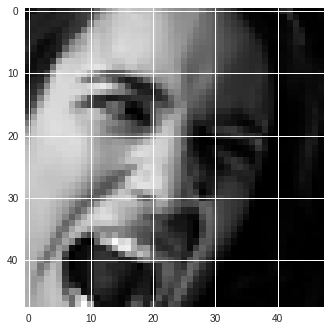

> testing image index: 20
> true emotion: angry
> predicted emotion: angry


In [0]:
# test model
import matplotlib.pyplot as plt
img_index=20
sample = Xvalid[img_index, :]
sample = sample.reshape(48, 48)


pred_cls = model.predict_classes(sample.reshape(1, 48, 48, 1))

plt.imshow(sample, cmap='gray')
plt.show()
print('> testing image index: %d\n> true emotion: %s\n> predicted emotion: %s' % (img_index, get_emotion(Yvalid[img_index, :]), get_emotion(pred_cls)))